In [ ]:
import os
import pandas as pd
import re
from tqdm import tqdm
from collections import Counter

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 500)

import warnings
warnings.simplefilter('ignore')

In [ ]:
from google.colab import drive
import json

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the file path
file_path = '/content/drive/My Drive/Colab Notebooks/NLP_Ignas/nlp_finalproject/'

In [ ]:
sentences_df = pd.read_csv(os.path.join(file_path, 'sentences.csv'))

# Display the DataFrame
sentences_df.head(2)

,article_id,sentence_id,sentence
0,1,1,Observation Simulation And AI Join Forces To Reveal A Clear Universe - SpaceRef Home NASA Watch SpaceRef Business Astrobiology Web Advertising Add an Event Sign up for our Daily Newsletter International Space Station NASA Hack Space Calendar Missions Space Weather Observation Simulation And AI Join Forces To Reveal A Clear Universe Press Release - Source NATIONAL INSTITUTES OF NATURAL SCIENCES Posted July 4 2021 1000 PM View Comments Using AI driven data analysis to peel back the noise and f...
1,1,2,CREDIT The Institute of Statistical Mathematics Japanese astronomers have developed a new artificial intelligence AI technique to remove noise in astronomical data due to random variations in galaxy shapes.


In [ ]:
sentences_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6523835 entries, 0 to 6523834
Data columns (total 3 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   article_id   int64 
 1   sentence_id  int64 
 2   sentence     object
dtypes: int64(2), object(1)
memory usage: 149.3+ MB


In [ ]:
sentences_df.shape

(6523835, 3)

In [ ]:
# Make a copy of sentences_df
df = sentences_df.copy()

industry

In [ ]:
import pandas as pd

# Creating the Industry DataFrame
data = {
    "Industry": [
        "Aerospace", "Agriculture", "Airline", "Apparel", "Automotive", "Biotech",
        "Biotechnology", "Chemical", "Communication Service", "Construction",
        "Consulting", "Consumer", "Defense", "E commerce", "E-commerce",
        "Education", "Energy", "Engineering", "Entertainment", "Finance",
        "Financial", "Fintech", "Bank", "Food and Beverage", "Game", "Gaming",
        "Hardware", "Health Care", "Healthcare", "Hotel", "Industrial",
        "Information Technology", "Insurance", "Law", "Legal", "Leisure",
        "Logistics", "Manufacturing", "Material", "Metal", "Mining",
        "Pharmaceutical", "Real Estate", "Restaurant", "Retail", "Semiconductor",
        "Software", "Telecommunication", "Transportation", "Publishing",
        "Renewable Energy", "Robotics", "Safety & Security", "Shipping",
        "Social Media", "Social Networking Service", "Sports", "Tourism",
        "Utilities", "Waste Management", "Water Resources", "Web Services",
        "Wholesale", "Blockchain", "Cloud Computing", "Cybersecurity",
        "Digital Marketing", "E-Learning", "Environmental Services",
        "Event Management", "Fashion", "Film Production", "Graphic Design",
        "Home Appliances", "Journalism", "Maritime", "Music Production", "NPO",
        "NGO", "Non-Profit Organization", "University", "Government", "School",
        "Personal Care", "Pet Care", "Art", "Public Relations",
        "Real Estate Development", "Research & Development",
        "Research and Development", "Retail Technology", "Safety and Security",
        "Social Networking", "Software Development", "Solar Energy",
        "Sports Equipment", "Textiles", "Travel Services", "Video Games"
    ]
}

industry_df = pd.DataFrame(data)

industry_df

,Industry
0,Aerospace
1,Agriculture
2,Airline
3,Apparel
4,Automotive
5,Biotech
6,Biotechnology
7,Chemical
8,Communication Service
9,Construction


job

In [ ]:
# Creating the Job DataFrame
job_data = {
    "Job": [
        "Engineer", "Account Executive", "Copywriter", "Graphic Designer",
        "Market Research Analyst", "Product Manager", "Agricultural Specialist",
        "Biochemist", "Biomedical Engineer", "Research Coordinator", "Microbiologist",
        "Architect", "Civil Engineer", "Construction Manager", "Surveyor", "Educator",
        "Energy Analyst", "Artist", "Financial Analyst", "Food Service Manager",
        "Public Service Officer", "Healthcare Professional", "Event Coordinator",
        "Industrial Engineer", "Logistics Manager", "Media Professional", "Geologist",
        "Research Associate", "Pharmaceutical Sales", "Quality Assurance Specialist",
        "Real Estate Professional", "Retail Manager", "Cybersecurity Specialist",
        "Network Engineer", "Software Developer", "Web Developer",
        "Transportation Manager", "Environmental Specialist", "Veterinarian",
        "Zoologist", "Business Manager", "Salon Professional",
        "Customer Service Representative", "Art Director", "Teacher", "Lecturer",
        "Professor", "Librarian", "Chemical Engineer", "Financial Adviser", "Caregiver",
        "Dental Professional", "Hospitality Manager", "Human Resources Manager",
        "Designer", "IT Professional", "Operations Manager", "Marketing Professional",
        "Media Specialist", "Scientist", "Athlete", "Fitness Professional",
        "Computer Specialist", "Artisan", "Carpenter", "AI Developer", "Data Scientist",
        "Machine Learning Engineer", "Data Analyst", "Data Engineer",
        "Research Scientist", "Writer", "Analyst", "Energy Specialist",
        "Financial Professional", "Chef", "Nutritionist", "Service Manager",
        "City Planner", "Hotel Manager", "Tourism Specialist", "Logistics Professional",
        "Quality Assurance Professional", "Editor", "Sales Professional",
        "Retail Professional", "Cybersecurity Professional", "Network Professional",
        "Software Professional", "Physicist", "Transportation Professional",
        "Animal Specialist", "Project Manager", "Business Professional",
        "Care Professional", "Hospitality Professional",
        "Human Resources Professional", "Software Engineer", "Media Producer",
        "Sports Professional"
    ]
}

job_df = pd.DataFrame(job_data)

job_df

,Job
0,Engineer
1,Account Executive
2,Copywriter
3,Graphic Designer
4,Market Research Analyst
5,Product Manager
6,Agricultural Specialist
7,Biochemist
8,Biomedical Engineer
9,Research Coordinator


technology

In [ ]:
# Creating the Technology DataFrame
technology_data = {
    "Technology": [
        "GenAI", "Gen AI", "Generative AI", "GPT", "GPT3.5", "GPT-3.5", "GPT4",
        "GPT-4", "ChatGPT", "LLM", "LLMs", "Transformer", "BERT", "PaLM", "LLaMA",
        "Cloud", "GPU", "Machine Learning", "ML", "Deep Learning",
        "Reinforcement Learning", "Transfer Learning", "Bard", "‎Gemini",
        "Conversational AI", "NLP", "Natural Language Processing", "Edge Computing",
        "HPC", "High-performance computing", "High performance computing", "Bing",
        "CRM", "Security Operation Center", "SOC", "Galaxy AI", "EV", "AI Ethics",
        "AI Governance", "AutoML", "AI for Good", "Quantum Computing",
        "Quantum Machine Learning", "Federated Learning", "Synthetic Data",
        "Robot Process Automation", "Natural Language Generation", "Computer Vision",
        "Image Recognition", "Speech Recognition", "Voice Assistants", "Semantic Web",
        "Knowledge Graphs", "Augmented Reality", "Virtual Reality", "Blockchain",
        "Cybersecurity", "Digital Twins", "Internet of Things", "Big Data", "AR",
        "VR", "RPA", "NLG", "IoT", "TensorFlow", "SoundHound AI", "OpenAI", "GPT-3",
        "DALL·E", "DALLE", "Codex", "Clip", "DeepMind", "VAE", "GAN",
        "Generative Adversarial Networks", "Diffusion Models", "T5", "XLNet",
        "ELECTRA", "RoBERTa", "AI21 Labs", "Stable Diffusion", "Midjourney",
        "Fine Tuning", "Model Adaptation", "Pre-trained Models", "Custom Models",
        "Model Retraining", "Hyperparameter Tuning", "Knowledge Distillation",
        "Feature Extraction", "Embedding Layer", "Vector Embeddings",
        "Semantic Search", "Approximate Nearest Neighbor", "Vector Database",
        "Vector Indexing", "Vector Search Engine", "Faiss", "Annoy", "Elasticsearch",
        "Pinecone", "Milvus", "Weaviate", "HNSW", "ScaNN", "IVF", "Quantization",
        "Vector Space Modeling", "Dimensionality Reduction", "t-SNE", "UMAP", "ANN",
        "Vector Search", "Sora", "Chatbot", "Image Generation"
    ]
}

technology_df = pd.DataFrame(technology_data)

technology_df

,Technology
0,GenAI
1,Gen AI
2,Generative AI
3,GPT
4,GPT3.5
5,GPT-3.5
6,GPT4
7,GPT-4
8,ChatGPT
9,LLM


### Create entities column

Add manually detected entities for industries, jobs, and technologies to a DataFrame (df) by searching for matching keywords in sentences. It uses a function to generalize keyword detection and updates the DataFrame with new entity columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6523835 entries, 0 to 6523834
Data columns (total 3 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   article_id   int64 
 1   sentence_id  int64 
 2   sentence     object
dtypes: int64(2), object(1)
memory usage: 149.3+ MB


In [ ]:
# Replace NaN or non-string values with an empty string
df['sentence'] = df['sentence'].fillna('').astype(str)

In [ ]:
%%time

from tqdm import tqdm

# Add tqdm to pandas apply to show progress
tqdm.pandas()

# Add manual entities in the same format as NER

# Define a function to detect if keywords are present in a sentence, converting both to lowercase.
# Accepts an entity type as an argument to generalize its use.
# Output: A list of lists, where each sublist contains a keyword and its corresponding entity type.
def find_keywords(sentence, keywords, entity_type):
    sentence_lower = sentence.lower()
    # Uses regular expressions (re.search) to check if each keyword is present in the sentence as a standalone word (\b ensures word boundaries).
    # If a keyword is found, it appends a list [keyword, entity_type] to the results.
    return [[keyword, entity_type] for keyword in keywords if re.search(r'\b{}\b'.format(re.escape(keyword.lower())), sentence_lower)]

# Create lists of keywords for industries, jobs, and technologies.
industry_keywords = industry_df['Industry'].tolist()
job_keywords = job_df['Job'].tolist()
tech_keywords = technology_df['Technology'].tolist()

# # Search for matching keywords in all sentences for each category.
# entities_ind = [find_keywords(sentence, industry_keywords, 'IND') for sentence in df['sentence']]
# entities_job = [find_keywords(sentence, job_keywords, 'JOB') for sentence in df['sentence']]
# entities_tech = [find_keywords(sentence, tech_keywords, 'TECH') for sentence in df['sentence']]

# # Add new columns to the DataFrame for each entity type.
# df['entities_ind'] = entities_ind
# df['entities_job'] = entities_job
# df['entities_tech'] = entities_tech

# Use tqdm to show progress while applying find_keywords
print("Processing industries...")
df['entities_ind'] = df['sentence'].progress_apply(lambda sentence: find_keywords(sentence, industry_keywords, 'IND'))

Processing industries...


100%|██████████| 6523835/6523835 [1:02:55<00:00, 1727.91it/s]


CPU times: user 1h 2min 50s, sys: 15.5 s, total: 1h 3min 5s
Wall time: 1h 2min 55s


In [ ]:
print("Processing jobs...")
df['entities_job'] = df['sentence'].progress_apply(lambda sentence: find_keywords(sentence, job_keywords, 'JOB'))

Processing jobs...


100%|██████████| 6523835/6523835 [1:06:05<00:00, 1645.08it/s]


In [ ]:
print("Processing technologies...")
df['entities_tech'] = df['sentence'].progress_apply(lambda sentence: find_keywords(sentence, tech_keywords, 'TECH'))

Processing technologies...


100%|██████████| 6523835/6523835 [1:24:14<00:00, 1290.65it/s]


In [ ]:
# from multiprocessing import Pool, cpu_count

In [ ]:
# # Define a function to detect if keywords are present in a sentence, converting both to lowercase.
# # Accepts an entity type as an argument to generalize its use.
# # Output: A list of lists, where each sublist contains a keyword and its corresponding entity type.

# def find_keywords(sentence, keywords, entity_type):
#     # Convert sentence to lowercase
#     sentence_lower = sentence.lower() if isinstance(sentence, str) else ""
#     # Uses regular expressions (re.search) to check if each keyword is present in the sentence as a standalone word (\b ensures word boundaries).
#     # If a keyword is found, it appends a list [keyword, entity_type] to the results.
#     return [[keyword, entity_type] for keyword in keywords if re.search(r'\b{}\b'.format(re.escape(keyword.lower())), sentence_lower)]

In [ ]:
# # Define a helper function that processes a row of the DataFrame, which includes finding entities for industries, jobs, and technologies.
# def process_row(row, industry_keywords, job_keywords, tech_keywords):
#     sentence = row['sentence']
#     return {
#         'entities_ind': find_keywords(sentence, industry_keywords, 'IND'),
#         'entities_job': find_keywords(sentence, job_keywords, 'JOB'),
#         'entities_tech': find_keywords(sentence, tech_keywords, 'TECH'),
#     }

In [ ]:
# # Define the parallel processing function
# def parallel_process(df, industry_keywords, job_keywords, tech_keywords):
#     # Create a worker function for parallel processing
#     def worker(row):
#         return process_row(row, industry_keywords, job_keywords, tech_keywords)

#     # Use a multiprocessing pool to process rows in parallel
#     with Pool(cpu_count() - 1) as pool:  # Leave one CPU free
#         # Wrap pool.imap with tqdm for a progress bar
#         results = list(tqdm(pool.imap(worker, df.to_dict('records')), total=len(df)))

#     return results

In [ ]:
# # Load keywords
# industry_keywords = industry_df['Industry'].tolist()
# job_keywords = job_df['Job'].tolist()
# tech_keywords = technology_df['Technology'].tolist()

# # Apply parallel processing
# results = parallel_process(df, industry_keywords, job_keywords, tech_keywords)

# # Extract results and assign to new columns
# df['entities_ind'] = [result['entities_ind'] for result in results]
# df['entities_job'] = [result['entities_job'] for result in results]
# df['entities_tech'] = [result['entities_tech'] for result in results]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6523835 entries, 0 to 6523834
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   article_id     int64 
 1   sentence_id    int64 
 2   sentence       object
 3   entities_ind   object
 4   entities_job   object
 5   entities_tech  object
dtypes: int64(2), object(4)
memory usage: 298.6+ MB


In [ ]:
# Show rows that has new entities
# Checks if any ind-related entities were detected in the sentence.
# Checks if any job-related entities were detected in the sentence.
# Checks if any tech-related entities were detected in the sentence.
# Only rows where all three conditions are True (i.e., entities detected for industries, jobs, and technologies) will be selected.
df[
    (df['entities_ind'].apply(lambda x: len(x) > 0)) &
    (df['entities_job'].apply(lambda x: len(x) > 0)) &
    (df['entities_tech'].apply(lambda x: len(x) > 0))
    ].head()

,article_id,sentence_id,sentence,entities_ind,entities_job,entities_tech
95,3,1,Flash for AI - 28 March 2024 - EBV Electrolink - Dataweek Home About us Back issues E-book PDF Subscribe Advertise EMP Handbook Categories Editor's Choice Multimedia Videos AI ML Analogue Mixed Signal LSI Circuit System Protection ComputerEmbedded Technology Design Automation DSP Micros Memory Edge Computing IIoT Electronics Technology Enclosures Racks Cabinets Panel Products Events Interconnection Manufacturing Production Technology Hardware Services News Opto-Electronics Passive Components...,"[[Hardware, IND], [Manufacturing, IND]]","[[Editor, JOB]]","[[ML, TECH], [Edge Computing, TECH], [IoT, TECH]]"
1914,46,3,The study led by Professor Brian Lucey and Professor Michael Dowling utilized the AI model known as ChatGPT to draft an academic paper in finance.,"[[Finance, IND]]","[[Professor, JOB]]","[[ChatGPT, TECH]]"
2960,70,2,- ExBulletin Entertainment Politics Fashion Sports Tech Business Contact Us Connect with us ExBulletin ChatGPT is not particularly revolutionary and nothing revolutionary said Metas chief AI scientist.,"[[Entertainment, IND], [Sports, IND], [Fashion, IND]]","[[Scientist, JOB]]","[[ChatGPT, TECH]]"
2961,70,3,Entertainment Politics Fashion Sports Tech Business Contact Us Tech ChatGPT is not particularly revolutionary and nothing revolutionary said Metas chief AI scientist.,"[[Entertainment, IND], [Sports, IND], [Fashion, IND]]","[[Scientist, JOB]]","[[ChatGPT, TECH]]"
4444,97,41,Technology Artificial Intelligence Cybersecurity Submit Louis Navellier Editor Market 360 Meet Louis Navellier Louis Navellier is one of Wall Streets renowned growth investors.,"[[Cybersecurity, IND]]","[[Editor, JOB]]","[[Cybersecurity, TECH]]"


In [ ]:
# Merge 3 entities columns to 'entities_combined'
df['entities_combined'] = df.apply(lambda row: row['entities_ind'] + row['entities_job'] + row['entities_tech'], axis=1)

In [ ]:
df.info()

In [ ]:
df_final = df[['article_id','sentence_id', 'sentence', 'entities_combined']]

In [ ]:
# Save the DataFrame as a CSV file
df_final.to_csv(file_path + 'sentences_with_job_ind_tech.csv', index=False)

In [ ]:
# Count entities

# function
# Count entities by type and return a DataFrame showing the top N entities for each specified type
def count_top_entities(entities_series, entity_types, top_n):
    counters = {entity_type: Counter() for entity_type in entity_types}

    # Iterate over the series to count entities by type
    for entities in entities_series:
        for entity_text, entity_type in entities:
            if entity_type in entity_types:
                counters[entity_type][entity_text] += 1

    # Prepare the DataFrame to display the top N entities for each type, filling in missing values
    top_entities_df = pd.DataFrame()
    for entity_type in entity_types:
        top_entities = counters[entity_type].most_common(top_n)
        # Ensure the list has a length of top_n by appending empty strings if necessary
        top_entities += [("", 0)] * (top_n - len(top_entities))
        top_entities_df[entity_type] = [f"{entity[0]} ({entity[1]})" if entity[0] else "" for entity in top_entities]

    return top_entities_df

In [ ]:
# Count entities by type
entity_types = ['IND', 'JOB', 'TECH']
top_n = 50

top_entities_df = count_top_entities(df['entities_combined'], entity_types, top_n)
top_entities_df

,IND,JOB,TECH
0,Software (128671),Analyst (19776),Cloud (122182)
1,Financial (100165),Editor (17298),Generative AI (120941)
2,Sports (87475),Professor (15782),Machine Learning (101190)
3,Entertainment (78697),Scientist (10016),ChatGPT (84544)
4,Healthcare (71748),Writer (9737),OpenAI (58864)
5,Education (70685),Artist (8752),Chatbot (37512)
6,Energy (70631),Engineer (7149),Cybersecurity (26310)
7,Government (63607),Athlete (6204),GPT (23726)
8,School (53135),Teacher (4984),ML (23338)
9,Consumer (49468),Designer (3556),Blockchain (21954)


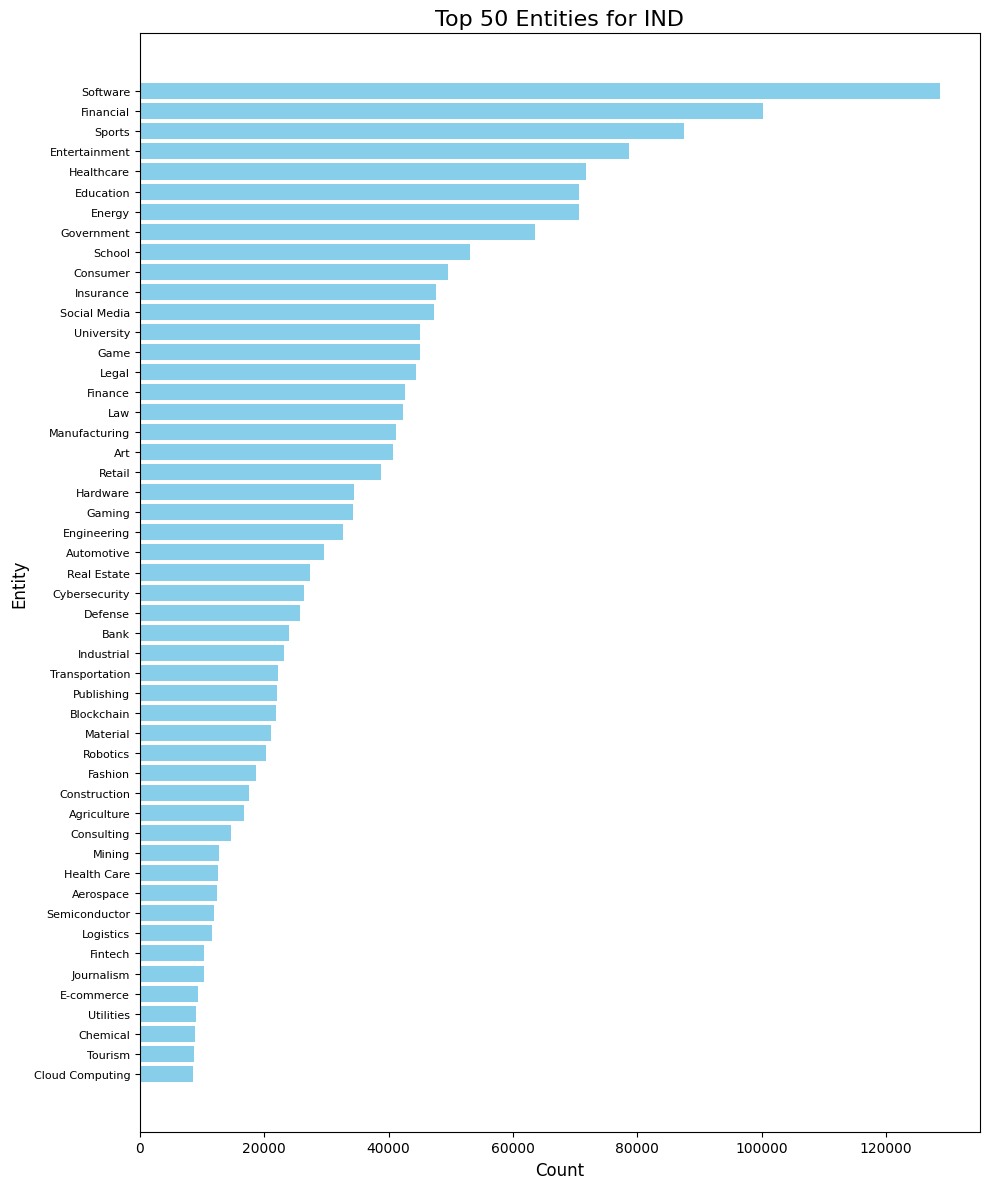

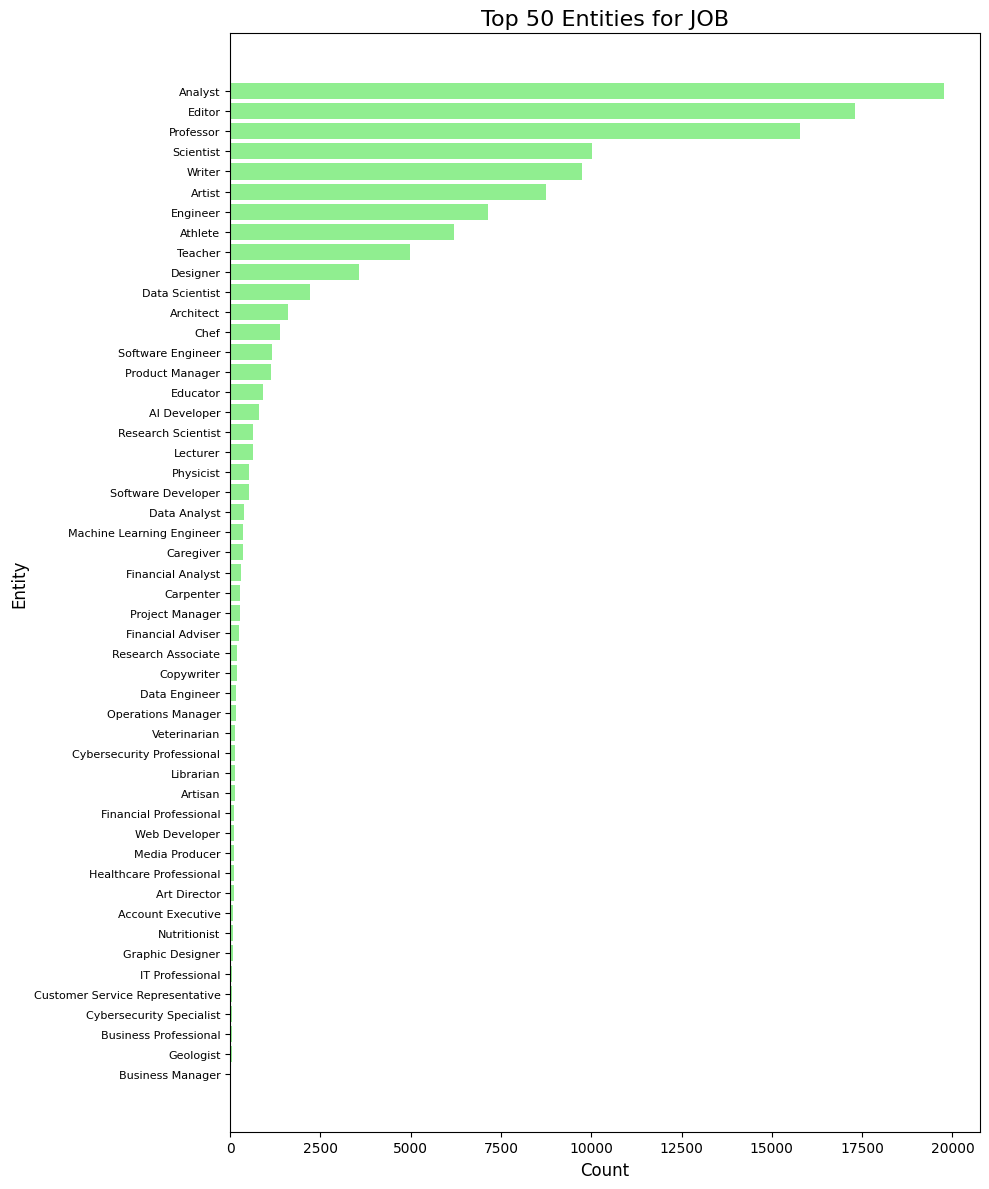

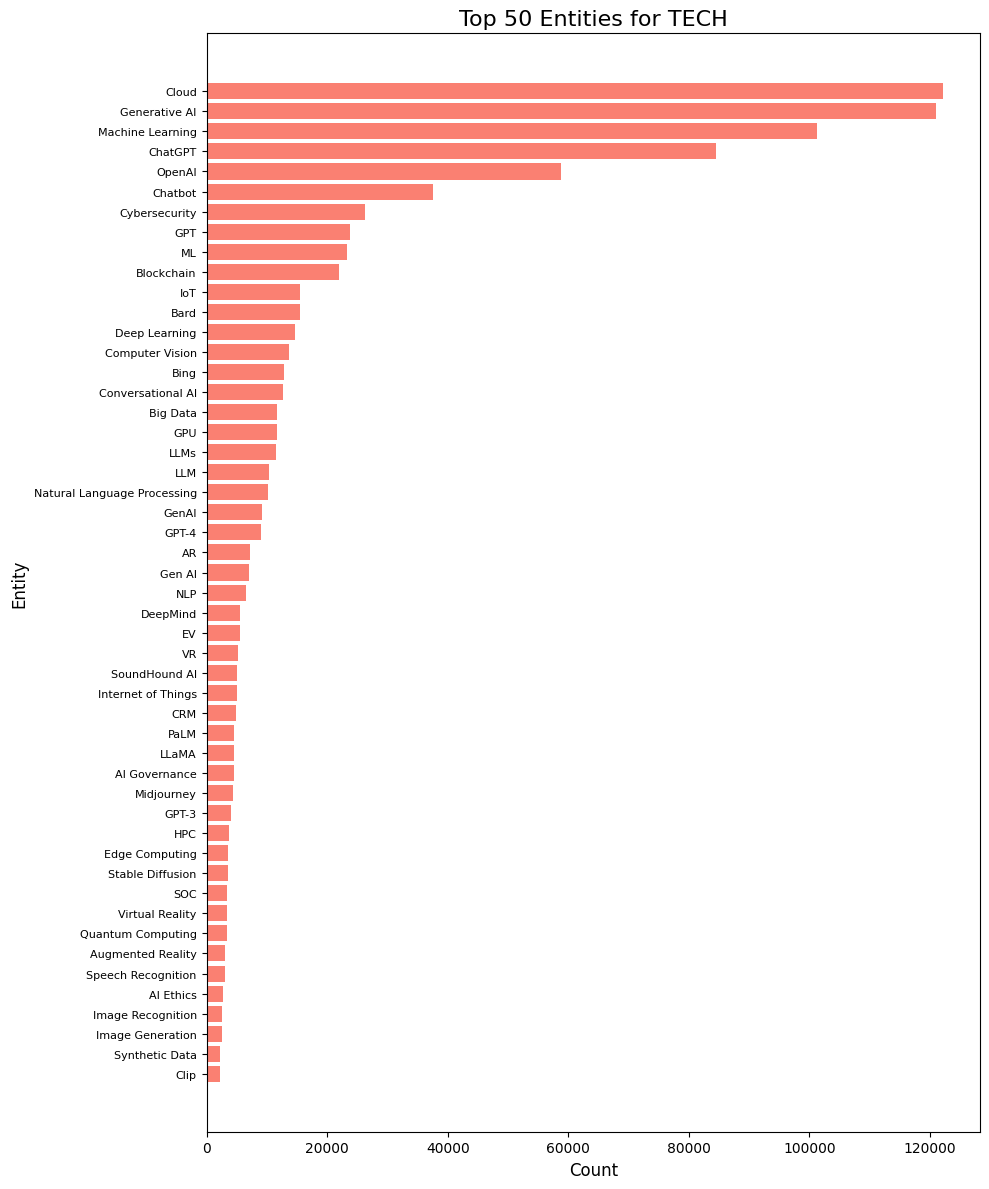

In [ ]:
import matplotlib.pyplot as plt

# Define a function to create a horizontal bar chart with a specified color
def plot_horizontal_bar_chart(data, column_name, title, bar_color):
    plt.figure(figsize=(10, 12))  # Set the figure size to fit 50 entities
    entities = [row.split(" (")[0] for row in data[column_name]]  # Extract entity names
    counts = [int(row.split(" (")[1][:-1]) for row in data[column_name]]  # Extract counts
    plt.barh(entities, counts, color=bar_color)  # Create a horizontal bar chart with specified color
    plt.title(title, fontsize=16)  # Set the title
    plt.xlabel("Count", fontsize=12)  # Set the x-axis label
    plt.ylabel("Entity", fontsize=12)  # Set the y-axis label
    plt.gca().invert_yaxis()  # Invert y-axis so the highest counts are at the top
    plt.xticks(fontsize=10)  # Set x-axis font size
    plt.yticks(fontsize=8)  # Set y-axis font size
    plt.tight_layout()  # Adjust layout for better visibility
    plt.show()  # Display the plot

# Plot horizontal bar charts for each entity type with different colors
plot_horizontal_bar_chart(top_entities_df, 'IND', 'Top 50 Entities for IND', bar_color='skyblue')
plot_horizontal_bar_chart(top_entities_df, 'JOB', 'Top 50 Entities for JOB', bar_color='lightgreen')
plot_horizontal_bar_chart(top_entities_df, 'TECH', 'Top 50 Entities for TECH', bar_color='salmon')

In [ ]:
df_final_2 = df[['article_id','sentence_id', 'entities_combined']]

In [ ]:
# Save the DataFrame as a CSV file
df_final_2.to_csv(file_path + 'sentences_id_with_job_ind_tech.csv', index=False)

In [ ]:
df.shape

(6523835, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6523835 entries, 0 to 6523834
Data columns (total 7 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   article_id         int64 
 1   sentence_id        int64 
 2   sentence           object
 3   entities_ind       object
 4   entities_job       object
 5   entities_tech      object
 6   entities_combined  object
dtypes: int64(2), object(5)
memory usage: 348.4+ MB
